# Data Visualization with Python and Data Viz Tools:  



<b> Introduction to Project 

In this project, I'll be exploring several data visualization tools used with Python including Great Tables, Plotly, and Plotly Express. I'll also be working with xlwings to work with Excel and attemot to include some interactive elements. 

I'll be working with 2 datasets and use them to create some interesting visualizations of the data including presentation of the different variables in tables, charts, and other plots using the dataviz tools mentioned. I'll start with some clean up the initial data that will be used in the plotting and statistical analysis. So let's begin......


# Part 1: Pizza 

Let's start with some fun data that's included with Great Tables which is one of the packages I'll explore. In this first part, I'll work with a dataset provided by Great Table (GT) in its package: data.pizzaplace which provides a year of pizza sales from a pizza place. One of my favorite foods is pizza and I've been able to enjoy some interesting pies in my life and thought it might be a great start to working with GT. I start with installing the Great Tables package, clean up the data, and test out some of those features..

## Preliminary Steps - Loading Packages

In [1]:
# To auto-reload modules in jupyter notebook (so that changes in files *.py doesn't require manual reloading):
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

I installed these packages from the command line first: plotly, Great Tables.....

We covered these in my Python class, but for those following along, it's easy to install packages.
From any conda environment or using pip install, I typed these commands:

For Plotly:
```
$ conda install -c plotly plotly=5.14.1
```
And for Great Tables:

```
pip install great_tables
```

And for Dash:

Dash is the best way to build analytical apps in Python using Plotly figures. To run the app below, run pip install dash, click "Download" to get the code and run python app.py (https://plotly.com/python/getting-started/)

```
$ conda install jupyterlab anywidget
```
or notebooks:
```
conda install "notebook>=7.0" "anywidget>=0.9.13"
```
Info on Plotly here:
https://plotly.com/python/getting-started/

And Great Tables:
https://posit-dev.github.io/great-tables/reference/
and here:
https://github.com/posit-dev/great-tables

I also checked out the GitHub Discussions on Great Tables here: https://posit-dev.github.io/great-tables/articles/intro.html  along my journey to using the package and the pizza dataset.


### Importing Libraries

Now we can import them along with our other commonly used libraries and magic command for inline plotting, etc.....

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from great_tables import GT, md, html
from great_tables import vals, from_column, style, loc
import datetime
from plotly.subplots import make_subplots
from IPython.display import Image
from great_tables import nanoplot_options, md
from xlwings import Range
from sqlalchemy import create_engine


In [3]:
%matplotlib inline

## Data Reading and Prep

First we'll start with reading in the data and determine what kind of cleaning we need to do to work with it.

The pizza place dataset I'll explore is a cleaned up one and simple, so it's a good way to begin looking at the visualization tools before moving onto a more complicated one. I do have to wrangle the data a bit once I load it into a dataframe, but there's some basic features we can use without reading the csv - by just importing the dataset directly.

I started with something easy - the GT class in Great Tables to display the variables with import below. 

In [4]:
# Here we'll import the pizza dataset

from great_tables.data import pizzaplace

### GT's Pizza Sales Dataset

Take a quick look at the first 10 rows in the dataset with default values and all variables



In [5]:
# Create a display table showing ten first records 

pizza_mini = pizzaplace.head(10)
gt_tbl = GT(pizza_mini)

# Show the output table
# If working in the console, use gt_tbl.show()
gt_tbl

id,date,time,name,size,type,price
2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25
2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.0
2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.0
2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75
2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.5
2015-000002,2015-01-01,11:57:40,ital_supr,L,supreme,20.75
2015-000003,2015-01-01,12:12:28,prsc_argla,L,supreme,20.75
2015-000003,2015-01-01,12:12:28,ital_supr,M,supreme,16.5
2015-000004,2015-01-01,12:16:31,ital_supr,M,supreme,16.5
2015-000005,2015-01-01,12:21:30,ital_supr,M,supreme,16.5


Does Great tables (GT) provide more information than what your data has? No, it really only makes display tables. But you can modify and add columns, format the data, and create some plots. Let's remove the id, and format the date and time differently and change our price to currency.

## GTs Formatting

We append each field we want to format with the column name and relevant formatting methods: .fmt_currency, .fmt_date etc and then add on some title with .tab_header

In [6]:
# Select our fields from the data, and add some formatting and titles

gt_pizza2 = GT(pizza_mini[["date", "time", "type" ,"price"]].head(5))
gt_pizza2 = gt_pizza2.fmt_currency(columns="price").fmt_date(columns="date", 
                                                             date_style="m_day_year").fmt_time(columns="time",
                                                             time_style="h_m_p").tab_header(title = 'Pizza Table Formatting')

# Display our GT table
gt_pizza2

GT(_tbl_data=         date      time     type  price
0  2015-01-01  11:38:36  classic  13.25
1  2015-01-01  11:57:40  classic  16.00
2  2015-01-01  11:57:40   veggie  16.00
3  2015-01-01  11:57:40  chicken  20.75
4  2015-01-01  11:57:40   veggie  18.50, _body=<great_tables._gt_data.Body object at 0x1080b7b30>, _boxhead=Boxhead([ColInfo(var='date', type=<ColInfoTypeEnum.default: 1>, column_label='date', column_align='right', column_width=None), ColInfo(var='time', type=<ColInfoTypeEnum.default: 1>, column_label='time', column_align='right', column_width=None), ColInfo(var='type', type=<ColInfoTypeEnum.default: 1>, column_label='type', column_align='left', column_width=None), ColInfo(var='price', type=<ColInfoTypeEnum.default: 1>, column_label='price', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x1080b71d0>, _spanners=Spanners([]), _heading=Heading(title='Pizza Table Formatting', subtitle=None, preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x14ad40f20>, _formats=[<great_tables._gt_data.FormatInfo object at 0x14a05e3f0>, <great_tables._gt_data.FormatInfo object at 0x14a772810>, <great_tables._gt_data.FormatInfo object at 0x14ad408c0>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value=

### Themes

We can spruce this up more with some premade Themes using grouping of our data, footnotes, and formatting the title itself with some bolding.

In [159]:


# Include a few fields from our GT object that we want to show and add the relevant formatting

gt_pizza3 = pizzaplace.head(10)[["date", "time", "name","type" ,"price"]]

gt_piz = (
    GT(gt_pizza3 , rowname_col="name", groupname_col="type")
    .tab_header(
        title=md("More Pizza Table Formatting"),
        subtitle=md("This is the **Great Tables** pizza dataset."),
    )
    .tab_stubhead(label="name")
    .fmt_time(columns="time")
    .fmt_currency(columns="price")
    .tab_source_note(source_note="Contains only a portion of the ~ 50 record dataset.")
    .opt_vertical_padding(scale=0.5)
)

gt_piz

GT(_tbl_data=         date      time         name     type  price
0  2015-01-01  11:38:36     hawaiian  classic  13.25
1  2015-01-01  11:57:40  classic_dlx  classic  16.00
2  2015-01-01  11:57:40     mexicana   veggie  16.00
3  2015-01-01  11:57:40     thai_ckn  chicken  20.75
4  2015-01-01  11:57:40  five_cheese   veggie  18.50
5  2015-01-01  11:57:40    ital_supr  supreme  20.75
6  2015-01-01  12:12:28   prsc_argla  supreme  20.75
7  2015-01-01  12:12:28    ital_supr  supreme  16.50
8  2015-01-01  12:16:31    ital_supr  supreme  16.50
9  2015-01-01  12:21:30    ital_supr  supreme  16.50, _body=<great_tables._gt_data.Body object at 0x15f5c1520>, _boxhead=Boxhead([ColInfo(var='date', type=<ColInfoTypeEnum.default: 1>, column_label='date', column_align='right', column_width=None), ColInfo(var='time', type=<ColInfoTypeEnum.default: 1>, column_label='time', column_align='right', column_width=None), ColInfo(var='name', type=<ColInfoTypeEnum.stub: 2>, column_label='name', column_align='left', column_width=None), ColInfo(var='type', type=<ColInfoTypeEnum.row_group: 3>, column_label='type', column_align='left', column_width=None), ColInfo(var='price', type=<ColInfoTypeEnum.default: 1>, column_label='price', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x15f577440>, _spanners=Spanners([]), _heading=Heading(title=Md(text='More Pizza Table Formatting'), subtitle=Md(text='This is the **Great Tables** pizza dataset.'), preheader=None), _stubhead='name', _source_notes=['Contains only a portion of the ~ 50 record dataset.'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x15f5c1eb0>, _formats=[<great_tables._gt_data.FormatInfo object at 0x15f5c11c0>, <great_tables._gt_data.FormatInfo object at 0x15f5c2120>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo

Now let's move the dataset into a dataframe so we can manipulate the data and create more interesting tables. GT supports both pandas and polars. Let's create a pandas dataframe.

### Moving our dataset to a Dataframe

We have several ways to move our data into a Dataframe. We can use the csv file that Great Tables provides and read in the data that way.

In [11]:
# Dataframe using Pandas

pizza_csv = '../../data/pizzaplace.csv'

df_pizza = pd.read_csv(pizza_csv)
# Getting first 3 rows from the DataFrame
df_pizza_mini = df_pizza.head(100)
df_pizza_mini.head(10)

,id,date,time,name,size,type,price
0,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25
1,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00
2,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00
3,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75
4,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50
5,2015-000002,2015-01-01,11:57:40,ital_supr,L,supreme,20.75
6,2015-000003,2015-01-01,12:12:28,prsc_argla,L,supreme,20.75
7,2015-000003,2015-01-01,12:12:28,ital_supr,M,supreme,16.50
8,2015-000004,2015-01-01,12:16:31,ital_supr,M,supreme,16.50
9,2015-000005,2015-01-01,12:21:30,ital_supr,M,supreme,16.50


In [51]:
df_pizza_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      100 non-null    object 
 1   date    100 non-null    object 
 2   time    100 non-null    object 
 3   name    100 non-null    object 
 4   size    100 non-null    object 
 5   type    100 non-null    object 
 6   price   100 non-null    float64
dtypes: float64(1), object(6)
memory usage: 5.6+ KB


Below, I'll clean up the data by creating some time and date fields from the existing date/time ones included and formatted as objects. I create 2 mini df to help with some plotting of the data later - I wanted to copy the first mini df (mini3) before I dropped some columns from it.

In [12]:
# Copy the original DataFrame to keep all 7 columns - 1 mini and 1 whole set
df_pizza2 = df_pizza.copy()
df_pizza_mini3 = df_pizza_mini.copy()

# Add the converted datetime column to both mini and whole set
df_pizza2['Time_dt'] = pd.to_datetime(df_pizza2['time'], format='%H:%M:%S')
df_pizza2['Month_Yr'] = pd.to_datetime(df_pizza2['date'], format='%Y-%m-%d')
df_pizza_mini3['Time_dt'] = pd.to_datetime(df_pizza_mini3['time'], format='%H:%M:%S')
df_pizza_mini3['Month_Yr'] = pd.to_datetime(df_pizza_mini3['date'], format='%Y-%m-%d')

# extract Hour and AM/PM and insert new column into 2 different dataframes: DF2 all, DF mini 3 & 4 - need 4 for month and time nums
df_pizza2['Hour_AMPM'] = df_pizza_mini3['Time_dt'].dt.strftime('%I %p')
df_pizza2['Month'] = df_pizza_mini3['Month_Yr'].dt.strftime('%b')
df_pizza_mini3['Hour_AMPM'] = df_pizza_mini3['Time_dt'].dt.strftime('%I %p')
df_pizza_mini3['Month'] = df_pizza_mini3['Month_Yr'].dt.strftime('%b')

# mini 4 to use later in plotting
df_pizza_mini4 = df_pizza_mini3.copy()  # to use later in plotting
df_pizza_mini4['Hour'] = df_pizza_mini4['Time_dt'].dt.hour
df_pizza_mini4['Month_num'] = df_pizza_mini4['Month_Yr'].dt.month
df_pizza_mini4 = df_pizza_mini4.drop(['id','Time_dt','time','date','Month_Yr'], axis=1)

# drop id and Time_dt
df_pizza_mini3 = df_pizza_mini3.drop(['id','Time_dt','time','date','Month_Yr'], axis=1)

df_pizza_mini3.head()


,name,size,type,price,Hour_AMPM,Month
0,hawaiian,M,classic,13.25,11 AM,Jan
1,classic_dlx,M,classic,16.00,11 AM,Jan
2,mexicana,M,veggie,16.00,11 AM,Jan
3,thai_ckn,L,chicken,20.75,11 AM,Jan
4,five_cheese,L,veggie,18.50,11 AM,Jan


In [54]:
# This quick mini df will be used later for plotting needing integers-I convert it to an int later.
df_pizza_mini4.head()
#df_pizza_mini4.info()

,name,size,type,price,Hour_AMPM,Month,Hour,Month_num
0,hawaiian,M,classic,13.25,11 AM,Jan,11,1
1,classic_dlx,M,classic,16.00,11 AM,Jan,11,1
2,mexicana,M,veggie,16.00,11 AM,Jan,11,1
3,thai_ckn,L,chicken,20.75,11 AM,Jan,11,1
4,five_cheese,L,veggie,18.50,11 AM,Jan,11,1


In [55]:
df_pizza_mini3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       100 non-null    object 
 1   size       100 non-null    object 
 2   type       100 non-null    object 
 3   price      100 non-null    float64
 4   Hour_AMPM  100 non-null    object 
 5   Month      100 non-null    object 
dtypes: float64(1), object(5)
memory usage: 4.8+ KB


## GTs Table Structures and Nanoplots

Great Tables works with pandas and polars, as mentioned, so any data needs to be converted to one of those structures. I used pandas due to familiarity. Below, I filter my dataframe and then read the Series back into a dataframe so I was able to use GT for plotting:

In [74]:
# replace GT object with dataframe of pizza data
# group df by pizza name and counts of each pizza name  = volume by name

# Group and count how many pizzas per name
pizza_series = df_pizza_mini3.groupby(['name'])['Hour_AMPM'].count()
pizza_df5 = pizza_series.to_frame().reset_index()

pizza_df5.columns=['Pizza Favorites', 'Hour_AMPM']
pizza_df5.head()


,Pizza Favorites,Hour_AMPM
0,bbq_ckn,7
1,big_meat,3
2,calabrese,1
3,cali_ckn,4
4,ckn_alfredo,1


### Pizza Menu with GT

In [154]:
# Filter to pizzas ordered at 12 PM
filter_df_piz = df_pizza_mini3[
    df_pizza_mini3['Hour_AMPM'].str.contains('12 PM', case=False, na=False)
]

# Drop Month
filter_df_piz = filter_df_piz.drop(['Month'], axis=1)

# Drop duplicates (1 row per name + size + type + price combo) plust add sorting
group_df1 = (
    filter_df_piz
    .drop_duplicates(subset=['name', 'size', 'type', 'price'])
    .sort_values(by=['type', 'size', 'name'])
)

# Put the Great Tables together with some formatting
gt_piz_filter = (
    GT(group_df1, rowname_col="name", groupname_col="type")
    .tab_header(
        title=md('Popular Pizzas at Lunchtime'),
        subtitle=md('Affordable **Pizza Prices** for 2015'),
    )
    .tab_stubhead(label="Pizza Name")
    .fmt_currency(columns="price")
    .tab_source_note(source_note="Lunch time includes all sales at noon.")
    .opt_vertical_padding(scale=0.5)
)

# Finally hide Hour_AMPM
gt_piz_filter = gt_piz_filter.cols_hide(columns='Hour_AMPM')

# Show my table
gt_piz_filter


GT(_tbl_data=            name size     type  price Hour_AMPM
10       bbq_ckn    S  chicken  12.75     12 PM
18   ital_cpcllo    L  classic  20.50     12 PM
21   classic_dlx    S  classic  12.00     12 PM
11     the_greek    S  classic  12.00     12 PM
14     ital_supr    L  supreme  20.75     12 PM
6     prsc_argla    L  supreme  20.75     12 PM
17    spicy_ital    L  supreme  20.75     12 PM
7      ital_supr    M  supreme  16.50     12 PM
22     ital_supr    S  supreme  12.50     12 PM
12  spinach_supr    S  supreme  12.50     12 PM
16    spin_pesto    L   veggie  20.75     12 PM
20  green_garden    S   veggie  12.00     12 PM
15      mexicana    S   veggie  12.00     12 PM
19    veggie_veg    S   veggie  12.00     12 PM, _body=<great_tables._gt_data.Body object at 0x15f577e60>, _boxhead=Boxhead([ColInfo(var='name', type=<ColInfoTypeEnum.stub: 2>, column_label='name', column_align='left', column_width=None), ColInfo(var='size', type=<ColInfoTypeEnum.default: 1>, column_label='size', column_align='left', column_width=None), ColInfo(var='type', type=<ColInfoTypeEnum.row_group: 3>, column_label='type', column_align='left', column_width=None), ColInfo(var='price', type=<ColInfoTypeEnum.default: 1>, column_label='price', column_align='right', column_width=None), ColInfo(var='Hour_AMPM', type=<ColInfoTypeEnum.hidden: 4>, column_label='Hour_AMPM', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x15f5760f0>, _spanners=Spanners([]), _heading=Heading(title=Md(text='Popular Pizzas at Lunchtime'), subtitle=Md(text='Affordable **Pizza Prices** for 2015'), preheader=None), _stubhead='Pizza Name', _source_notes=['Lunch time includes all sales at noon.'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x15f56ae40>, _formats=[<great_tables._gt_data.FormatInfo object at 0x15b1cf710>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='ta

In [203]:
filter_df_piz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 6 to 22
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       17 non-null     object 
 1   size       17 non-null     object 
 2   type       17 non-null     object 
 3   price      17 non-null     float64
 4   Hour_AMPM  17 non-null     object 
dtypes: float64(1), object(4)
memory usage: 816.0+ bytes


### Pizza Nanoplot with formatting

In [161]:
# Replace GT object with dataframe of pizza data
# THen group df by pizza type and sum of price per pizza type = sales by type
pizza_series = df_pizza_mini.groupby(['type'])['price'].sum()

# Convert to DataFrame and rename columns
pizza_df4 = pizza_series.reset_index()
pizza_df4.columns = ['Pizza Style', 'Sales']

# Sort by Sales (descending)
pizza_df4 = pizza_df4.sort_values(by='Sales', ascending=False)

# Display the GT, format as currency and add nanoplots
gt_sales = (
    GT(pizza_df4)
    .fmt_currency(columns='Sales')  
    .fmt_nanoplot(columns='Sales')  
    .tab_header(
        title='Pizzas by Sales for 2015',
        subtitle='With Veggie Pizza Sales on Top'
    )
)
gt_sales

GT(_tbl_data=  Pizza Style   Sales
3      veggie  490.65
1     classic  414.25
0     chicken  404.50
2     supreme  359.50, _body=<great_tables._gt_data.Body object at 0x15f5c3710>, _boxhead=Boxhead([ColInfo(var='Pizza Style', type=<ColInfoTypeEnum.default: 1>, column_label='Pizza Style', column_align='left', column_width=None), ColInfo(var='Sales', type=<ColInfoTypeEnum.default: 1>, column_label='Sales', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x15f5c2d50>, _spanners=Spanners([]), _heading=Heading(title='Pizzas by Sales for 2015', subtitle='With Veggie Pizza Sales on Top', preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x15f5c2cc0>, _formats=[<great_tables._gt_data.FormatInfo object at 0x15f5c3530>, <great_tables._gt_data.FormatInfo object at 0x15f5c2db0>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=OptionsInfo(scss=True, category='heading', type='value', value=None), heading_align=OptionsInfo(scss=True, category='heading', type='value', value='center'), heading_title_font_size=OptionsInfo(scss=True, category='heading', type='px', value='125%'), heading_title_font_weight=OptionsInfo(scss=True, category='heading', type='value', value='in

We've seen some of the Table Structures to add Spanners for your headers and Grouping along with Formatting your data- which included string and value formats and nanoplots. In addition,  GT has styles, themes - including premade ones -  and Selecting Table parts.

## Working with Plotly

Plotting the data with Plotly and Poltly Express are not too complicated with data in the proper format and they can make some visually appealing plots. 

In [23]:
# Some prep work for Plotly
# Suppress annoying warnings fixed in new Plotly but still showing up
import warnings

warnings.filterwarnings(
    action="ignore",
    message=r"When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas\. Pass `\(name,\)` instead of `name` to silence this warning\.",
    category=FutureWarning,
    module=r"plotly\.express\._core",
)

Plotly express makes it easy to bring in your dataset and add some colors to your categories and hover descriptors. Here's a simple scatter plot of the different pizza names by price, color-coded by 
size in the legend, and the ability to see Pizza type (and other details) by hovering over the data point.


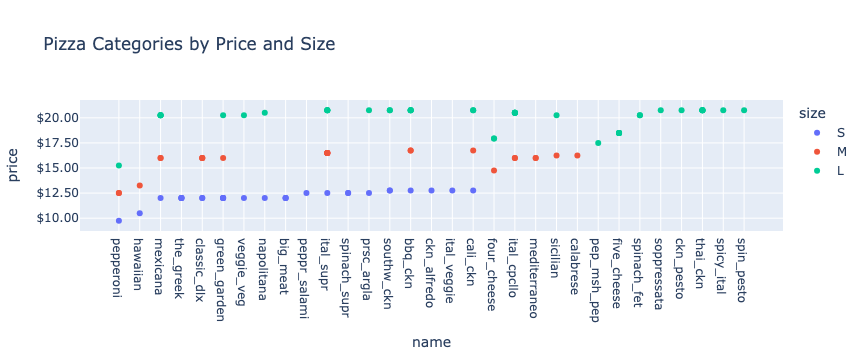

In [105]:
# Scatter plot
# First sort the DataFrame by price (ascending)
df_sorted = df_pizza_mini.sort_values(by='price', ascending=True)

fig = px.scatter(df_sorted,
                x='name',
                y='price',
                hover_name='type',
                color='size',
                title='Pizza Categories by Price and Size'
                )
fig.update_layout(yaxis=dict(dtick=2.5))
fig.update_layout(yaxis_tickprefix = '$', yaxis_tickformat = ',.2f')
fig.show()

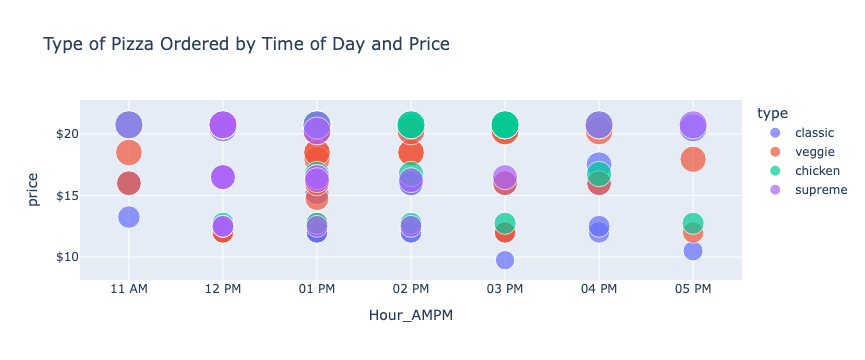

In [106]:
# Another scatter plot with some variation on the data point to show increasing price

fig = px.scatter(df_pizza_mini3, 
                title="Type of Pizza Ordered by Time of Day and Price",
                x="Hour_AMPM", y="price", color="type",
                size='price', hover_data=['name'])
fig.update_layout(yaxis_tickprefix = '$', yaxis_tickformat = ',.0f')
fig.show()

### A Bar Graph of the Pizza Sales

Plotly express has several options for plotting bar graphs as well with hover elements on data bars.

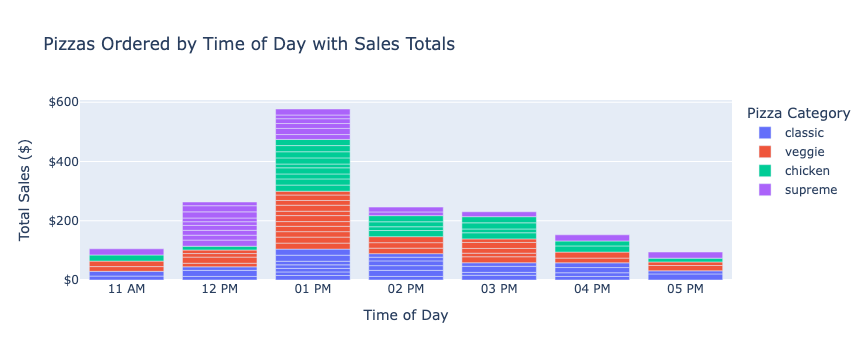

In [111]:
# A Plotly Bar chart
# The bar chart sums the amount of pizzas sold during the time of data

fig = px.bar(df_pizza_mini3, 
                title="Pizzas Ordered by Time of Day with Sales Totals",
                x="Hour_AMPM", y="price", color="type", labels={
        "Hour_AMPM": "Time of Day",
        "price": "Total Sales ($)",
        "type": "Pizza Category"  }, hover_data=['name'])
fig.update_layout(yaxis_tickprefix = '$', yaxis_tickformat = ',.0f')
fig.show()

#### Wrapping Column Facets

Chris Moffit covers some Plotly examples in his article here: https://pbpython.com/plotly-look.html
He has an example of faceting your data which I do below: faceting on pizza type, pizza size by size, and then their sales???? by type.

In [28]:
# Check the dataframe to refresh our memory what fields we have.

df_pizza_mini3.head()

,name,size,type,price,Hour_AMPM,Month
0,hawaiian,M,classic,13.25,11 AM,Jan
1,classic_dlx,M,classic,16.00,11 AM,Jan
2,mexicana,M,veggie,16.00,11 AM,Jan
3,thai_ckn,L,chicken,20.75,11 AM,Jan
4,five_cheese,L,veggie,18.50,11 AM,Jan


### A Pizza Plot with Faceting

We can also do some plotting of the pizza sales by Hour of the day and faceting on the Pizza types. We can see some of the popular pizzas and that most are buying pizzas between lunch and dinner (no surprise). 

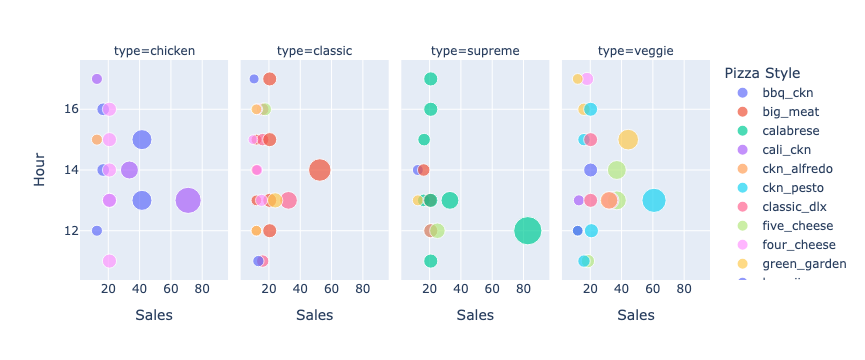

In [136]:
# Group by the pizza type and create a sales colum

pizza_series = df_pizza_mini4.groupby(['name','type','Hour'])['price'].sum()
pizza_df5 = pizza_series.reset_index()

# Rename the Columns
pizza_df5.columns = ['Pizza Style','type','Hour' ,'Sales']

# Plot the df
fig = px.scatter(pizza_df5, x='Sales', y='Hour', color='Pizza Style', size='Sales',
                facet_col='type', facet_col_wrap=4)
fig.show()

# Part 2: Operating Expenses at Universities - Where Does the Money Go?

In this next part, I'll work with some Financial Datasets from a public university to see where Academic and Administrative units spend their budgets.

### Data Reading and Prep

The data set comes in 2 formats and I'll read in both - with slightly different information. The first is a large excel file of many financial records from a public university. The second is from the same univerisity with some different information saved to csv files. Let's start with the excel file.

Pseudocode: pull in excel files, dataframe? deal with empty feilds, convert numbers and texts as needed, delete cols

First step would be to read the CSV file into a pandas dataframe using the pandas read_csv() function. I can customize how to read it in with the various input arguments once I get a quick overview of the variables and the default values.

parse dates - convert to date time and then extract month: https://www.kaggle.com/code/alexisbcook/parsing-dates

In [30]:
# Read in the csv file with default values and all variables
ou1 = pd.read_csv('../../data/ou_expenses.csv')
ou1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21638 entries, 0 to 21637
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FSYR_CODE                 21638 non-null  int64  
 1   FUND_CODE                 21638 non-null  int64  
 2   FUND_DESC                 21638 non-null  object 
 3   DivisionOrg               21638 non-null  int64  
 4   Diivision                 21638 non-null  object 
 5   UnitOrg                   21638 non-null  int64  
 6   Unit                      21638 non-null  object 
 7   ACCT_CODE                 21638 non-null  object 
 8   ACCT_DESC                 21638 non-null  object 
 9   PROG_CODE                 21638 non-null  int64  
 10  HEADER_RUCL_CODE          21638 non-null  object 
 11  FIELD_CODE_KEY            21638 non-null  object 
 12  ORGN_DESC                 21638 non-null  object 
 13  SumOfTRANSACTION_AMOUNT   21638 non-null  float64
 14  DEBIT_

In [31]:
# Some of the variables are self explanatory but let's take a peak at the first few records 
# to get an idea of what we might be able to visualize of interest

ou1.head()

,FSYR_CODE,FUND_CODE,FUND_DESC,DivisionOrg,Diivision,UnitOrg,Unit,ACCT_CODE,ACCT_DESC,PROG_CODE,HEADER_RUCL_CODE,FIELD_CODE_KEY,ORGN_DESC,SumOfTRANSACTION_AMOUNT,DEBIT_CREDIT_IND,TRANSACTION_DATE,TRANSACTION_DESC,DETAIL_DOCUMENT_CODE,DETAIL_SUM_POST_DOC_CODE,DETAIL_SEQ_NUMBER
0,2020,10006,Off Of Dean Cas,2154,Academic Affairs,20,Arts & Sciences,K003,Advertising-Press/Newspaper,2360,JE16,YTD,Arts & Sciences,475.0,+,28-Apr-20,PCARD 6824 BLUE LAKES FEST AD,JAC01476,4290833,2106
1,2020,10006,Off Of Dean Cas,2154,Academic Affairs,20,Arts & Sciences,K003,Advertising-Press/Newspaper,2360,JE16,YTD,Arts & Sciences,400.0,+,28-Apr-20,PCARD 6824 NATS CONF AD,JAC01476,4290833,2103
2,2020,10006,Off Of Dean Cas,2154,Academic Affairs,20,Arts & Sciences,K003,Advertising-Press/Newspaper,2360,JVBM,YTD,Arts & Sciences,-475.0,-,21-May-20,CD Mar Blue Lakes Fest Ad,J0230938,5211239,2
3,2020,10006,Off Of Dean Cas,2154,Academic Affairs,20,Arts & Sciences,K003,Advertising-Press/Newspaper,2360,JVBM,YTD,Arts & Sciences,-400.0,-,21-May-20,CD Mar NATS Conf Ad,J0230938,5211239,8
4,2020,10015,SVPAA-Uni & Comm Outreach,2154,Academic Affairs,2154,Academic Affairs,E069,Display Materials,2360,INNI,YTD,Academic Affairs,98.0,+,05-Aug-19,Laserpoint,I0537665,8051441,1


In [32]:
# Another way - using multiple csvs

file_name = '../../data/fin_trans_2024.csv'
# code here to bring in csv into one datadrame
# Clean data, drop columns, convert datatypes as needed

# Start with one csv file to look at the data
univ_exp24 = pd.read_csv(file_name)
univ_exp24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13819 entries, 0 to 13818
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FIELD_CODE_KEY              13819 non-null  object 
 1   POSTING_PERIOD              13819 non-null  int64  
 2   MONTH_ABBR                  13819 non-null  object 
 3   FISCAL_YEAR                 13819 non-null  int64  
 4   ACCOUNT                     13819 non-null  object 
 5   ACCOUNT_DESC                13819 non-null  object 
 6   ACCOUNT_POOL                13819 non-null  int64  
 7   ACCOUNT_POOL_DESC           13819 non-null  object 
 8   ACTUAL_ORGANIZATION_DESC_2  13819 non-null  object 
 9   ACTUAL_ORGANIZATION_DESC_3  12315 non-null  object 
 10  TOTAL_AMOUNT                13819 non-null  float64
dtypes: float64(1), int64(3), object(7)
memory usage: 1.2+ MB


Before we decide if we need to use any of read_csv features to change the data, let's look at the first few records.

In [33]:
univ_exp24.head()

,FIELD_CODE_KEY,POSTING_PERIOD,MONTH_ABBR,FISCAL_YEAR,ACCOUNT,ACCOUNT_DESC,ACCOUNT_POOL,ACCOUNT_POOL_DESC,ACTUAL_ORGANIZATION_DESC_2,ACTUAL_ORGANIZATION_DESC_3,TOTAL_AMOUNT
0,YTD,1,JUL,2024,K025,Fees-Membership/Admissions,7101,Supplies & Services Budget,Student Affairs & Diversity,Enrollment Management,2114.00
1,YTD,1,JUL,2024,K025,Fees-Membership/Admissions,7101,Supplies & Services Budget,Academic Affairs,School of Medicine,8668.00
2,YTD,1,JUL,2024,K025,Fees-Membership/Admissions,7101,Supplies & Services Budget,Academic Affairs,Graduate Education & Academic Admin,302.00
3,YTD,1,JUL,2024,X260,Tuition-Resident Grad-Summer,5206,Tuition & Fees External Budget,Finance & Administration,Assoc VP & Controller,2665502.60
4,YTD,1,JUL,2024,X013,Default Charges,5201,External Revenue Budget,Finance & Administration,Assoc VP & Controller,-19978.51


Some of the data won't be necessary for plotting or EDA, so let's clean our file in a 2nd version. We could do this in the dataframe conversion but I won't need that data at all in this data exploration so we can use the readcsv parametres. We can convert some of the field types, drop a few columns, rename some of our columns, and create a new month field and eliminate the granularity of the transaction date. And we won't need the index so let's move (remove????) it. 

In [35]:
# Read in the csv file, drop the index, remove few cols:
# drop Field (all revenue/expenses are YTD) and Period (which equals month)
univ_exp24_df = pd.read_csv(file_name, index_col= False, dtype={'MONTH_ABBR': 'string',
                    'ACCOUNT_DESC': 'string', 
                    'ACCOUNT_POOL_DESC': 'string',
                    'ACTUAL_ORGANIZATION_DESC_2':'string',
                    'ACTUAL_ORGANIZATION_DESC_3':'string'}, 
                      usecols=['MONTH_ABBR','FISCAL_YEAR', 
                           'ACCOUNT_DESC',
                           'ACCOUNT_POOL_DESC',
                           'ACTUAL_ORGANIZATION_DESC_2',
                          'ACTUAL_ORGANIZATION_DESC_3',
                          'TOTAL_AMOUNT'],
                          )
univ_exp24.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13819 entries, 0 to 13818
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FIELD_CODE_KEY              13819 non-null  object 
 1   POSTING_PERIOD              13819 non-null  int64  
 2   MONTH_ABBR                  13819 non-null  object 
 3   FISCAL_YEAR                 13819 non-null  int64  
 4   ACCOUNT                     13819 non-null  object 
 5   ACCOUNT_DESC                13819 non-null  object 
 6   ACCOUNT_POOL                13819 non-null  int64  
 7   ACCOUNT_POOL_DESC           13819 non-null  object 
 8   ACTUAL_ORGANIZATION_DESC_2  13819 non-null  object 
 9   ACTUAL_ORGANIZATION_DESC_3  12315 non-null  object 
 10  TOTAL_AMOUNT                13819 non-null  float64
dtypes: float64(1), int64(3), object(7)
memory usage: 1.2+ MB


In [36]:
# Rename the columns

univ_exp24_df.columns = ['Month','Year','Account','Budget_Pool','Division','Unit','Amount']
univ_exp24_df.head(5)

,Month,Year,Account,Budget_Pool,Division,Unit,Amount
0,JUL,2024,Fees-Membership/Admissions,Supplies & Services Budget,Student Affairs & Diversity,Enrollment Management,2114.00
1,JUL,2024,Fees-Membership/Admissions,Supplies & Services Budget,Academic Affairs,School of Medicine,8668.00
2,JUL,2024,Fees-Membership/Admissions,Supplies & Services Budget,Academic Affairs,Graduate Education & Academic Admin,302.00
3,JUL,2024,Tuition-Resident Grad-Summer,Tuition & Fees External Budget,Finance & Administration,Assoc VP & Controller,2665502.60
4,JUL,2024,Default Charges,External Revenue Budget,Finance & Administration,Assoc VP & Controller,-19978.51


In [37]:
# It looks like I'm missing some values in column 7 which is the Unit/Dept. I'll assign the Division
# name to those

# fill blanks in Unit column
univ_exp24_df['Unit'] = univ_exp24_df['Unit'].replace('', np.nan)  # Optional: treat blanks as NaN
univ_exp24_df['Unit'] = univ_exp24_df['Unit'].fillna(univ_exp24_df['Division'])
univ_exp24_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13819 entries, 0 to 13818
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        13819 non-null  string 
 1   Year         13819 non-null  int64  
 2   Account      13819 non-null  string 
 3   Budget_Pool  13819 non-null  string 
 4   Division     13819 non-null  string 
 5   Unit         13819 non-null  string 
 6   Amount       13819 non-null  float64
dtypes: float64(1), int64(1), string(5)
memory usage: 755.9 KB


In [38]:
univ_exp24_df.head() 

,Month,Year,Account,Budget_Pool,Division,Unit,Amount
0,JUL,2024,Fees-Membership/Admissions,Supplies & Services Budget,Student Affairs & Diversity,Enrollment Management,2114.00
1,JUL,2024,Fees-Membership/Admissions,Supplies & Services Budget,Academic Affairs,School of Medicine,8668.00
2,JUL,2024,Fees-Membership/Admissions,Supplies & Services Budget,Academic Affairs,Graduate Education & Academic Admin,302.00
3,JUL,2024,Tuition-Resident Grad-Summer,Tuition & Fees External Budget,Finance & Administration,Assoc VP & Controller,2665502.60
4,JUL,2024,Default Charges,External Revenue Budget,Finance & Administration,Assoc VP & Controller,-19978.51


In [39]:
# Dataframe of Expenses only
# Copy dataframe to remove revenue accounts after data wrangling for main dataset
expenses_only_df = univ_exp24.copy()
# Remove expense accounts
expenses_only_df = expenses_only_df[expenses_only_df['ACCOUNT_POOL'] // 1000 != 5]
expenses_only_df = expenses_only_df.drop(['FIELD_CODE_KEY','POSTING_PERIOD','ACCOUNT','ACCOUNT_POOL'], axis=1)

# Rename the columns
expenses_only_df.columns = ['Month','Year','Account','Budget_Pool','Division','Unit','Amount']
expenses_only_df.head()

,Month,Year,Account,Budget_Pool,Division,Unit,Amount
0,JUL,2024,Fees-Membership/Admissions,Supplies & Services Budget,Student Affairs & Diversity,Enrollment Management,2114.00
1,JUL,2024,Fees-Membership/Admissions,Supplies & Services Budget,Academic Affairs,School of Medicine,8668.00
2,JUL,2024,Fees-Membership/Admissions,Supplies & Services Budget,Academic Affairs,Graduate Education & Academic Admin,302.00
6,JUL,2024,Advertising-Internet,Supplies & Services Budget,Senior VP of External Affairs,Communications & Marketing,-152257.49
7,JUL,2024,UC&M -Design,Supplies & Services Budget,Academic Affairs,School of Medicine,2500.00


In [137]:
# Using Expense only dataset - do same data wrangling

# Rename the columns
expenses_only_df.columns = ['Month','Year','Account','Budget_Pool','Division','Unit','Amount']
expenses_only_df.head(5)
# Assign blank units with Division name to those

# fill blanks in Unit column
expenses_only_df['Unit'] = univ_exp24_df['Unit'].replace('', np.nan)  # Optional: treat blanks as NaN
expenses_only_df['Unit'] = univ_exp24_df['Unit'].fillna(univ_exp24_df['Division'])
expenses_only_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13297 entries, 0 to 13818
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        13297 non-null  object 
 1   Year         13297 non-null  int64  
 2   Account      13297 non-null  object 
 3   Budget_Pool  13297 non-null  object 
 4   Division     13297 non-null  object 
 5   Unit         13297 non-null  string 
 6   Amount       13297 non-null  float64
dtypes: float64(1), int64(1), object(4), string(1)
memory usage: 831.1+ KB


In [166]:
# Group by Accounts for Advertising or Marketing and apply sum to 'Value1' and mean to 'Value2'
# ***FORMAT Numbers ********

filtered_df = univ_exp24_df[
    univ_exp24_df['Account'].str.contains('Marketing|Advertising', case=False, na=False)
]
grouped_df = filtered_df.groupby('Account').agg(
Total_Exp=('Amount', 'sum'),
Average_Exp=('Amount', 'mean')
)
formatted_df = grouped_df2.apply(lambda x: "${:,.0f}".format(x))
print(formatted_df)


Division                Account                    
Academic Affairs        Advertising-Employment          $22,570
                        Advertising-Internet           $193,514
                        Advertising-Outdoor              $7,400
                        Advertising-Press/Newspaper      $9,452
                        Animal Care                     $29,996
                                                         ...   
University Advancement  Univ Serv-Golf Course           $11,528
                        Univ Serv-MBH                   $36,906
                        Univ Serv-Oakland Center           $640
                        Univ Serv-Physical Plant         $4,920
                        Univ Serv-Print Shop            $56,538
Name: Amount, Length: 545, dtype: object


We can also see which sort of which Divisions spend the most and in which category.

In [140]:
# Group by Division and , then calculate the mean of 'Value'
#   *****SORT BY top spending and then top category ****
# First filter on only non-comp expenses and no revenue
# Filter on top 10 spending categories
filtered_df2 = univ_exp24_df[
    univ_exp24_df['Budget_Pool'].str.contains('Supplies', case=False, na=False)
]

grouped_df2 = filtered_df2.groupby(['Division', 'Account',])['Amount'].sum()
formatted_df = grouped_df2.apply(lambda x: "${:,.0f}".format(x))
print(formatted_df)


Division                Account                    
Academic Affairs        Advertising-Employment          $22,570
                        Advertising-Internet           $193,514
                        Advertising-Outdoor              $7,400
                        Advertising-Press/Newspaper      $9,452
                        Animal Care                     $29,996
                                                         ...   
University Advancement  Univ Serv-Golf Course           $11,528
                        Univ Serv-MBH                   $36,906
                        Univ Serv-Oakland Center           $640
                        Univ Serv-Physical Plant         $4,920
                        Univ Serv-Print Shop            $56,538
Name: Amount, Length: 545, dtype: object


Now, I have some tables of these University expenses, but they're not something I'd want to present to Executive Leadership. How can we make it look more interesting, and provide some analytical feaures. I'm going to revisit Great Tables.

### Making * WOW* Data table with Great Tables

Now that we know what the dataset looks like, let's do some analysis on the all of the data, and see if there are any trends. First, we'll take a look at some of GT features and I'll make a subset of my dataframe to work with.

#### Start with Styles

You can highlight specific cells in your table with the .tab_style feature with many highlighting colors to choose from. All of this is detailed in GT's documentaton.

In [201]:
# Styles table with Highlighting and order by Unit
filtered_df0 = univ_exp24_df[
    (univ_exp24_df['Budget_Pool'].str.contains('Supplies', case=False, na=False)) & 
    (univ_exp24_df['Amount'] <= 500)  & (univ_exp24_df['Amount'] > 0) &
    (univ_exp24_df['Month'].isin(['JUL'])) &
    (univ_exp24_df['Division'] == 'Finance & Administration') 
   # (univ_exp24_df['Account'] == 'Computer-Software')
]
(
    GT(filtered_df0, rowname_col = "Unit")
    .fmt_currency(columns="Amount")
    .tab_header(
        title="University Purchases July 2024",
        subtitle="Purchases by Finance & Admin by Unit"
    )
    .tab_stubhead(label="Unit")
    .tab_style(
    style=style.fill(color="lightcyan"),
    locations=loc.body(columns="Amount", rows=[1, 2]))
)


GT(_tbl_data=      Month  Year                   Account                 Budget_Pool  \
1789    JUL  2024      Univ Serv-Print Shop  Supplies & Services Budget   
3499    JUL  2024      Employment Physicals  Supplies & Services Budget   
3547    JUL  2024  Univ Serv-Physical Plant  Supplies & Services Budget   
10435   JUL  2024            Fees - License  Supplies & Services Budget   
12130   JUL  2024       Armored Car Service  Supplies & Services Budget   

                       Division                         Unit  Amount  
1789   Finance & Administration        Facilities Management    8.00  
3499   Finance & Administration            Police Department  190.00  
3547   Finance & Administration  Budget & Financial Planning   37.80  
10435  Finance & Administration        Facilities Management   45.00  
12130  Finance & Administration        Assoc VP & Controller  169.74  , _body=<great_tables._gt_data.Body object at 0x160faab40>, _boxhead=Boxhead([ColInfo(var='Month', type=<ColInfoTypeEnum.default: 1>, column_label='Month', column_align='left', column_width=None), ColInfo(var='Year', type=<ColInfoTypeEnum.default: 1>, column_label='Year', column_align='right', column_width=None), ColInfo(var='Account', type=<ColInfoTypeEnum.default: 1>, column_label='Account', column_align='left', column_width=None), ColInfo(var='Budget_Pool', type=<ColInfoTypeEnum.default: 1>, column_label='Budget_Pool', column_align='left', column_width=None), ColInfo(var='Division', type=<ColInfoTypeEnum.default: 1>, column_label='Division', column_align='left', column_width=None), ColInfo(var='Unit', type=<ColInfoTypeEnum.stub: 2>, column_label='Unit', column_align='left', column_width=None), ColInfo(var='Amount', type=<ColInfoTypeEnum.default: 1>, column_label='Amount', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x160fa8c50>, _spanners=Spanners([]), _heading=Heading(title='University Purchases July 2024', subtitle='Purchases by Finance & Admin by Unit', preheader=None), _stubhead='Unit', _source_notes=[], _footnotes=[], _styles=[StyleInfo(locname=LocBody(columns='Amount', rows=[1, 2], mask=None), grpname=None, colname='Amount', rownum=1, colnum=None, styles=[CellStyleFill(color='lightcyan')]), StyleInfo(locname=LocBody(columns='Amount', rows=[1, 2], mask=None), grpname=None, colname='Amount', rownum=2, colnum=None, styles=[CellStyleFill(color='lightcyan')])], _locale=<great_tables._gt_data.Locale object at 0x160fabd70>, _formats=[<great_tables._gt_data.FormatInfo object at 0x160fa9c70>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(

#### GT Table Structures 

In [175]:
# A quick glance of GT Using notes and subheaders

univ_mini_df = univ_exp24_df[
    #(univ_exp24_df['Period'] < 7) &
    (univ_exp24_df['Month'].isin(['JUL', 'AUG', 'SEP','OCT','NOV','DEC'])) &
    (univ_exp24_df['Division'] == 'Finance & Administration') &
    (univ_exp24_df['Account'] == 'Computer-Software')
]

# Add footnotes and format amounts as currency using GT object
(
    GT(univ_mini_df, rowname_col = "Unit")
    .fmt_currency(columns="Amount")
    .tab_header(
        title="Computer Sofware Purchases Jul - Dec 2024",
        subtitle="Purchases by Finance & Admin by Unit"
    )
    .tab_source_note(
        source_note="Source: Data extracted from Banner ERP on 06/12/2025."
    )
    .tab_source_note(
        source_note=md("Reference: Public University data presented by Great Tables: https://posit-dev.github.io/great-tables/get-started/")
    )
    .tab_stubhead(label="Unit")
)

GT(_tbl_data=      Month  Year            Account                 Budget_Pool  \
256     SEP  2024  Computer-Software  Supplies & Services Budget   
4265    DEC  2024  Computer-Software  Supplies & Services Budget   
5388    AUG  2024  Computer-Software  Supplies & Services Budget   
7116    AUG  2024  Computer-Software  Supplies & Services Budget   
7274    SEP  2024  Computer-Software  Supplies & Services Budget   
9241    NOV  2024  Computer-Software  Supplies & Services Budget   
10847   OCT  2024  Computer-Software  Supplies & Services Budget   
12877   DEC  2024  Computer-Software  Supplies & Services Budget   

                       Division                      Unit   Amount  
256    Finance & Administration     Assoc VP & Controller   861.40  
4265   Finance & Administration  Finance & Administration   157.43  
5388   Finance & Administration     Facilities Management  1728.89  
7116   Finance & Administration     Assoc VP & Controller    21.19  
7274   Finance & Administration     Facilities Management     0.00  
9241   Finance & Administration     Assoc VP & Controller    21.19  
10847  Finance & Administration     Assoc VP & Controller    21.19  
12877  Finance & Administration     Assoc VP & Controller    21.19  , _body=<great_tables._gt_data.Body object at 0x16091c350>, _boxhead=Boxhead([ColInfo(var='Month', type=<ColInfoTypeEnum.default: 1>, column_label='Month', column_align='left', column_width=None), ColInfo(var='Year', type=<ColInfoTypeEnum.default: 1>, column_label='Year', column_align='right', column_width=None), ColInfo(var='Account', type=<ColInfoTypeEnum.default: 1>, column_label='Account', column_align='left', column_width=None), ColInfo(var='Budget_Pool', type=<ColInfoTypeEnum.default: 1>, column_label='Budget_Pool', column_align='left', column_width=None), ColInfo(var='Division', type=<ColInfoTypeEnum.default: 1>, column_label='Division', column_align='left', column_width=None), ColInfo(var='Unit', type=<ColInfoTypeEnum.stub: 2>, column_label='Unit', column_align='left', column_width=None), ColInfo(var='Amount', type=<ColInfoTypeEnum.default: 1>, column_label='Amount', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x16091caa0>, _spanners=Spanners([]), _heading=Heading(title='Computer Sofware Purchases Jul - Dec 2024', subtitle='Purchases by Finance & Admin by Unit', preheader=None), _stubhead='Unit', _source_notes=['Source: Data extracted from Banner ERP on 06/12/2025.', Md(text='Reference: Public University data presented by Great Tables: https://posit-dev.github.io/great-tables/get-started/')], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x16091d580>, _formats=[<great_tables._gt_data.FormatInfo object at 0x1608718e0>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_f

### GT Themes - including Premade Ones

A simple call to the .opt_stylize makes our table above much more presentable. There are 6 styles and 2 colors (blue or red) to choose from.

In [165]:
(
    GT(univ_mini_df, rowname_col = "Unit")
    .fmt_currency(columns="Amount")
    .tab_header(
        title="Computer Sofware Purchases Jul - Dec 2024",
        subtitle="Purchases by Finance & Admin by Unit"
    )
    .tab_source_note(
        source_note="Source: Data extracted from Banner ERP on 06/12/2025."
    )
    .tab_source_note(
        source_note=md("Reference: Public University data presented by Great Tables: https://posit-dev.github.io/great-tables/get-started/")
    )
    .tab_stubhead(label="Unit")
    .opt_stylize(style=6, color="blue")
)


GT(_tbl_data=      Month  Year            Account                 Budget_Pool  \
256     SEP  2024  Computer-Software  Supplies & Services Budget   
4265    DEC  2024  Computer-Software  Supplies & Services Budget   
5388    AUG  2024  Computer-Software  Supplies & Services Budget   
7116    AUG  2024  Computer-Software  Supplies & Services Budget   
7274    SEP  2024  Computer-Software  Supplies & Services Budget   
9241    NOV  2024  Computer-Software  Supplies & Services Budget   
10847   OCT  2024  Computer-Software  Supplies & Services Budget   
12877   DEC  2024  Computer-Software  Supplies & Services Budget   

                       Division                      Unit   Amount  
256    Finance & Administration     Assoc VP & Controller   861.40  
4265   Finance & Administration  Finance & Administration   157.43  
5388   Finance & Administration     Facilities Management  1728.89  
7116   Finance & Administration     Assoc VP & Controller    21.19  
7274   Finance & Administration     Facilities Management     0.00  
9241   Finance & Administration     Assoc VP & Controller    21.19  
10847  Finance & Administration     Assoc VP & Controller    21.19  
12877  Finance & Administration     Assoc VP & Controller    21.19  , _body=<great_tables._gt_data.Body object at 0x1606b7b00>, _boxhead=Boxhead([ColInfo(var='Month', type=<ColInfoTypeEnum.default: 1>, column_label='Month', column_align='left', column_width=None), ColInfo(var='Year', type=<ColInfoTypeEnum.default: 1>, column_label='Year', column_align='right', column_width=None), ColInfo(var='Account', type=<ColInfoTypeEnum.default: 1>, column_label='Account', column_align='left', column_width=None), ColInfo(var='Budget_Pool', type=<ColInfoTypeEnum.default: 1>, column_label='Budget_Pool', column_align='left', column_width=None), ColInfo(var='Division', type=<ColInfoTypeEnum.default: 1>, column_label='Division', column_align='left', column_width=None), ColInfo(var='Unit', type=<ColInfoTypeEnum.stub: 2>, column_label='Unit', column_align='left', column_width=None), ColInfo(var='Amount', type=<ColInfoTypeEnum.default: 1>, column_label='Amount', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x15ffe5640>, _spanners=Spanners([]), _heading=Heading(title='Computer Sofware Purchases Jul - Dec 2024', subtitle='Purchases by Finance & Admin by Unit', preheader=None), _stubhead='Unit', _source_notes=['Source: Data extracted from Banner ERP on 06/12/2025.', Md(text='Reference: Public University data presented by Great Tables: https://posit-dev.github.io/great-tables/get-started/')], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x1606d07a0>, _formats=[<great_tables._gt_data.FormatInfo object at 0x1606d0a10>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_f

### Working with Plotly

Plotly and Plotly express provide some nice tools to visualize your data. One plot - the scatter plot-  allows you to distingush one of your features by more than the legend, including color, size, and hover elements. Below I made a plot of the main expenditure category (supplies and services which is the catch all for most non-compensation expenses) and assigned hover to the Account which gives you subcategory expenses. 

#### Scatter Plot with Dimensions

Here, I have a scatter plot with the following dimensions: Amount, Month, Unit, and Account -for one Division (Academic Affairs).
Hovering over a point, you can see the subcategory of spending (ie Fees - Professional) and the Unit or Dept is the hue, or color of the hovering box description. 

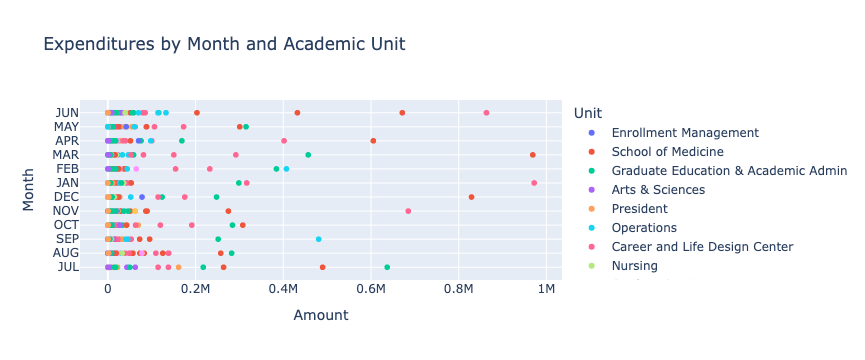

In [45]:
# I had added size = amount but it was blowing out the small amounts and we can already see
# the spending volume on the y axis. Size=amount does make for an interesting graph though
# but I left it out.

filtered_df3 = univ_exp24_df[
    (univ_exp24_df['Budget_Pool'].str.contains('Supplies', case=False, na=False)) &
    (univ_exp24_df['Amount'] > 0)
] 

fig = px.scatter(
                filtered_df3,
                x='Amount',
                y='Month',
                color='Unit',
                hover_name='Account',
                #size='Amount',
                title='Expenditures by Month and Academic Unit')
fig.show()

#### Wrapping Column Facets

You can also facet on a dimension. Here I'll facet on month, show Division by color, and then their expenses by Division.

In [46]:
# First - go above and create dataframe without revenue
expenses_only_df.head()

,Month,Year,Account,Budget_Pool,Division,Unit,Amount
0,JUL,2024,Fees-Membership/Admissions,Supplies & Services Budget,Student Affairs & Diversity,Enrollment Management,2114.00
1,JUL,2024,Fees-Membership/Admissions,Supplies & Services Budget,Academic Affairs,School of Medicine,8668.00
2,JUL,2024,Fees-Membership/Admissions,Supplies & Services Budget,Academic Affairs,Graduate Education & Academic Admin,302.00
6,JUL,2024,Advertising-Internet,Supplies & Services Budget,Senior VP of External Affairs,Communications & Marketing,-152257.49
7,JUL,2024,UC&M -Design,Supplies & Services Budget,Academic Affairs,School of Medicine,2500.00


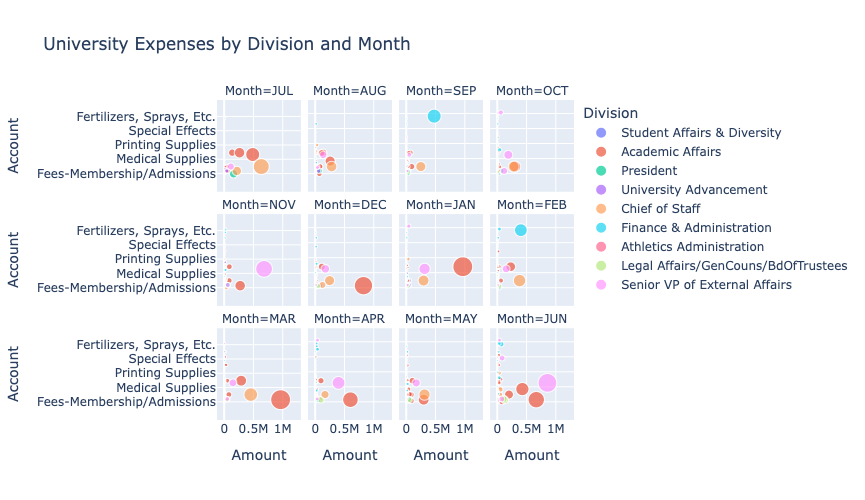

In [47]:
## Another scatter plot of Expenses by Division and Month

filtered_df4 = expenses_only_df[
   (expenses_only_df['Budget_Pool'].str.contains('Supplies & Services Budget', case=False, na=False)) &
    (expenses_only_df['Amount'] > 0)
] 
#df = ()
fig = px.scatter(filtered_df4, x='Amount', y='Account',  title='University Expenses by Division and Month', 
                 color='Division', size='Amount',
                facet_col='Month', facet_col_wrap=4, width=1000, height=500
                )
fig.show()

#### Sunburst - a robust pie chart on any multiple Dimensions

Below, I have the pie chart broken down by Division then Unit with the Total amount of their expenditures. You can hover to find out the details on the Division, Unit, and Total Spent.

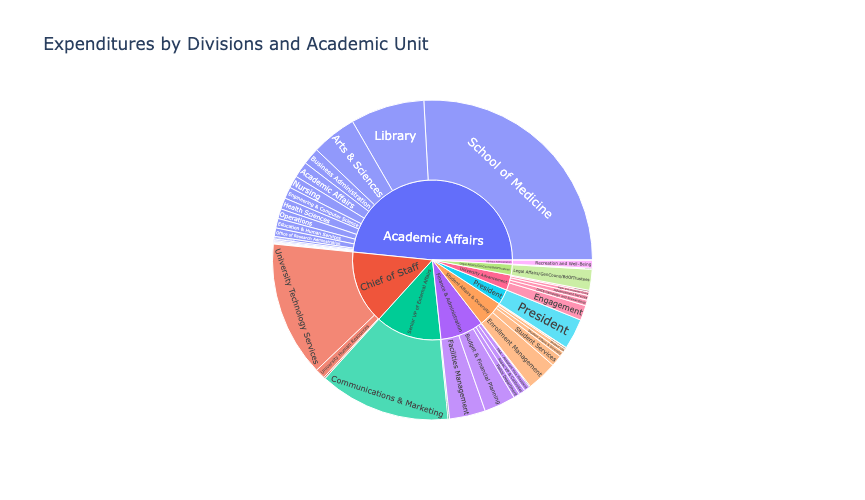

In [48]:
# A fun little pie chart - maybe a bit weedy

filter_df5 = univ_exp24_df[
   (univ_exp24_df['Budget_Pool'].str.contains('Supplies', case=False, na=False)) &
    (univ_exp24_df['Amount'] > 0)
] 
fig = px.sunburst(filter_df5, title='Expenditures by Divisions and Academic Unit',
                  path=['Division','Unit'], values='Amount',
                    width=500, height=500
                 )
fig.show()

I could have also done the expenditures by Account to see a breakout of where the $ are spent.

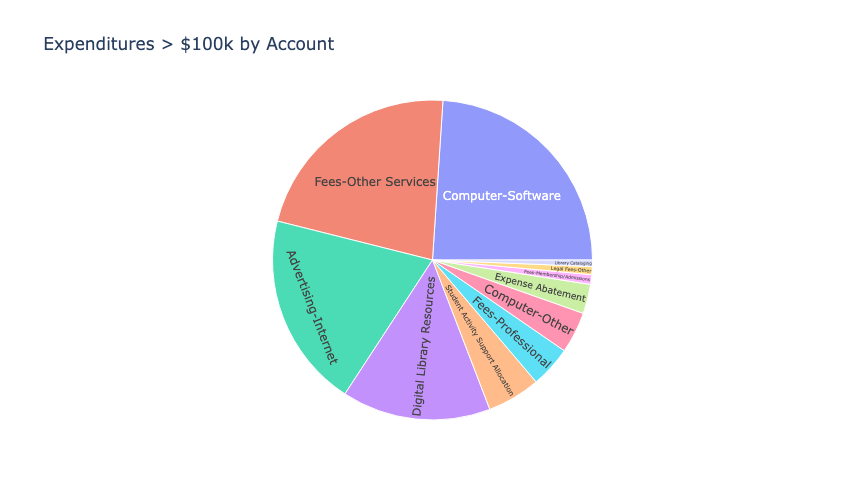

In [118]:
# A Simpler Pie chart by Account wuth all S&S expenses > $100,000

filter_df6 = univ_exp24_df[
   (univ_exp24_df['Budget_Pool'].str.contains('Supplies', case=False, na=False)) &
    (univ_exp24_df['Amount'] >100000)
] 
fig = px.sunburst(filter_df6, title='Expenditures > $100k by Account',
                  path=['Account'], values='Amount',
                    width=500, height=500
                 )
fig.show()

#### Shelf Plot

The shelf plot was super easy to create and with some filtered data from above, we can view the top categories by Division and Spending Category and hover over elements for more details.

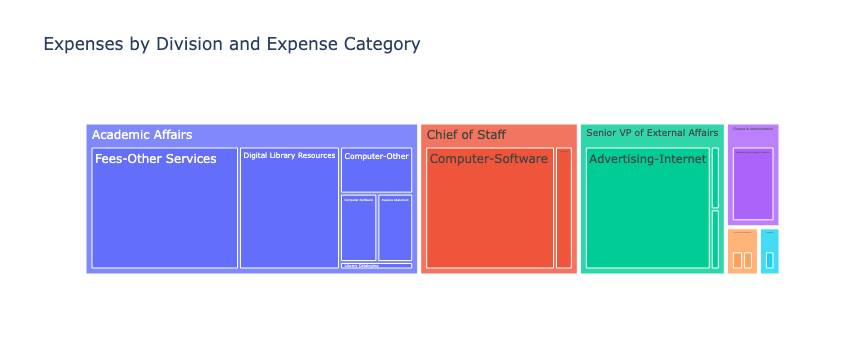

In [133]:
# Shelf plot

fig = px.treemap(filter_df6 , path=['Division','Account'],
                 values='Amount', title='Expenses by Division and Expense Category')
fig.show()

#### Histograms

There are also some features to facet your data in histograms by column (and/or row) and the various columns of your data.  It takes some time to filter your data and choose your faceting and column selection - but it's fun to change it up if not looking for any trends.

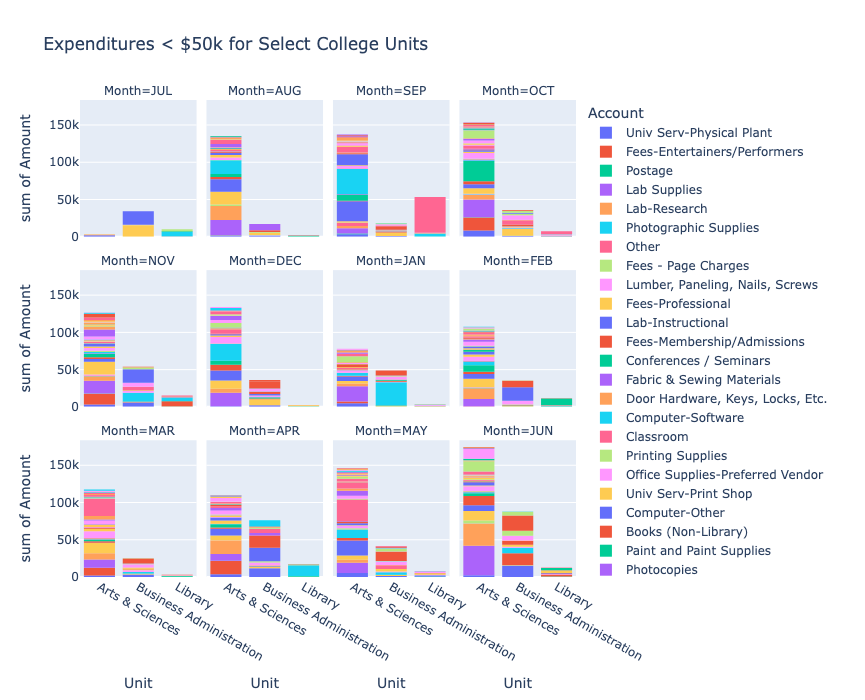

In [135]:
# Display a faceted histogram - this one takes a few to format

filter_df6 = expenses_only_df[
   (expenses_only_df['Budget_Pool'].str.contains('Supplies', case=False, na=False)) &
   (expenses_only_df['Amount'] >= 0) & (expenses_only_df['Amount'] <= 50000) &
    (expenses_only_df['Division'].str.contains('Academic Affairs', case=False, na=False)) &
    (expenses_only_df['Unit'].str.contains('Business|Library|Arts & Sciences', case=False, na=False))
] 
fig = px.histogram(filter_df6, x="Unit", y="Amount", color="Account",  facet_col="Month", facet_col_wrap=4,  
                   title='Expenditures < $50k for Select College Units', width=1000, height=700)
       #category_orders={"Month": ["Thur", "Fri", "Sat", "Sun"], "time": ["Lunch", "Dinner"]})
      #facet_row="Division",
fig.show()

### Interactive Visualizations with Dash

Next, I wanted to see some visuals that could be manipulated by user input. We saw some of that with Great tables but Dash - which works with Plotly - is another great tool.

We pip install Dash and ......

In [ ]:
# Dash Code

app = Dash()


### Advanced Excel with xlwings: Interactive Visualization

I decided to look into xlwings to see if I could bring in my data directly from my Access database. This was complicated but with Chris Moffit's article guiding me how to use xlwings here: https://pbpython.com/xlwings-pandas-excel.html - I thought it would be doable. Unfortunately, he assumed the developer was using a Windows environment, which means I need to assume my developer role #2 hat, set up my PC with Git, the aap environment, and clone my repo to track and make changes in the PC.


### Setting up the PC

I did most of this project on a Mac which was my main computer and I set up initially with my env and installed packages but xlwings UDFs (User defined functions) only works on Windows. I'll show a few things from my Mac before moving to the work in the Windows environment to test interactive visualization. Working on my PC involved a few more installs and then I was ready to work in the PC.

### Back to xlwings.....

What is xlwings? It's a way to bring Excel, Python and pandas together by using the xlwings tool to bring your data straight from your external database - no need to generate your csv files and read it outside python. It does some high level data wrangling and manipulation and delivers the data to your audience in a spreadsheet format - here I'll use Excel. You can use Python to analyze your data in your database and then write your ouput to Excel. I followed Chris Moffit's article that guided me how to use xlwings: https://pbpython.com/xlwings-pandas-excel.html  You build your data analysis tool to pull from your database (MS Access, etc), modify the data in pandas format, and then display to your enduser in their facvorite spreadsheet like Excel. xlwings has 2 options: 1- Control Excel from python or 2-Call custom python code from within Excel. Chris explains the latter, so I'm going with that.

First, we insall xlwings by entering this at command line if proper folder/env:

conda install xlwings

Then run this at command line to generate some helper files, including an Excel file with VBA code:

We'll get back to that but I wanted to review the xlwings and see what other capabilities they have: https://docs.xlwings.org/en/latest/ 


### xlwings  Load & View Functions

If you want to simply load your dataframe read in from csv(s) earlier, or another spreadsheet / Excel file, you could use the Load command. View will output your dataframe to a new Excel workbook.

In [ ]:
# Let's recall our pizza df
df_pizza_mini.head(5)

#### Moving to Windows Environment for next section

****** This section on only works on Windows ******** 

While xlwings works for MacOs, I recieved too many errors to continue so I'm saving this section in a new notebook. Even though I wasn't able to succssfully run my function - which would make my table in Excel interactive by asking for user input - I have some work in my new notebook that explains the process. I was using Git for collaboration but I found I was able to work faster with 2 notebooks. I added the NB to Git and tracked the changes on my PC.

Most of this is tracked in my Notes.doc with screesnshots - below is the text only and images are viewable in the Word doc.

I used this website to guide me through the process: Kevin Markham (Data School) for git:  https://www.youtube.com/watch?v=O72FWNeO-xY&list=PL5-da3qGB5IBLMp7LtN8Nc3Efd4hJq0kD
I set up my PC computer – to work in my ‘role’ as developer 2– going through setting up my aap environment and downloading Git on my Windows workstatio and then copied the clone url from my Git hub account established with my main developer role. I used the html clone but also could have used a SSH clone.
Repo from git is now a subdirectory in the folder I’m in at the terminal:
 
I typed this in terminal:
Cd data_viz
And then ls to see my list of files. From Kevin’s video, I should be seeing main or master for my Git branch – I was not so I opened my Git Bash shell (not necessary on a Mac), did a cd to my repo folder, and then saw the correct branch:
  
I then returned to my anaconda prompt to activate jupyter notebook (lab?) to open the jupyter notebook. 
I opened another anaconda prompt and navigated to my aap env to install xlwings.
Install xlwings at command line
 conda install Xlwings
then run at command line to create a new directory which will have an empty python file:
xlwings quickstart pbp_proj
  
It will also have an excel with VBA code: pbp_proj.xlsm. I’ll move these to my project folder and track them both by adding them to git repo.
Opening the excel file, and enabling my Developer from the ribbon, I see:
 
My excel template (image)
 
Added .py file to Git
Modified pbp.py file: 

Modified Excel VBA code in Module1: 
Add button and assign macro:
 
Created simple db or table??
Tried created MS Access db and some copied tables from my original csvs
That didn’t work – it would not read the database
I tried to use memory from load xlwing – nope
I found a migration software that converts your db: https://www.dbsofts.com/articles/ms_access_to_sqlite/ 
 
– did that after some work to convert MS access db to SQLite db – success!!

Now I need to pass some SQL code to my function which will be run from the python file: when the user pushes the button in the Excel file after entering the data requests. But kept getting this message, or similar: 

Traceback (most recent call last):
Error: 
  File "<string>", line 1, in <module>

  File "c:\users\jurbano\data_viz\notebooks\input\pbp_proj.py", line 3, in <module>

    from xlwings import Workbook, Range

ImportError: cannot import name 'Workbook' from 'xlwings' (C:\Users\jurbano\AppData\Local\anaconda3\envs\aap\Lib\site-packages\xlwings\__init__.py)

I had many errors messages about not finding my python file, my anaconda is too old – It was finding an older version. I decided to be happy with the progress I made in the short amount of time.....

In [ ]:
# Back to the code to do some simple tasks with xlwings - before interactive section:
# Using the Load function on your dataframe and Excel sheet

# import the xlwings and view and load packages
import xlwings as xw
from xlwings import load, view
# Connect to the Excel application
wb = xw.Book('xlwings_test.xlsx')  # Replace 'your_excel_file.xlsx' with your Excel file's name

# Access the Excel sheet
sheet = wb.sheets['Sheet1']  # Replace 'Sheet1' with your sheet's name if different

# Perform the calculation (e.g., sum the values)
sum_result = sheet.range('A2').value + sheet.range('A3').value + sheet.range('A4').value

# Output the result to Excel
sheet.range('J6').value = sum_result

# Close the workbook
wb.close()


In [ ]:
# Using the Load function on your dataframe and Excel sheet

# import the xlwings and view and load packages
import xlwings as xw
from xlwings import load, view

# View will export data to new Excel Workbook
view(df_pizza_mini)

In [ ]:
# Load will load the current table you have in your kernel 
load()

I realized I needed to downoad VS Code because xlwings looks for a .py file although I could work with in in Jupyter NB too.

I also needed to 
 * download migration software to convert Access db to squlite
 * pip install: 
        -sqlalchemy to migrate Access data

Back to PBPython tutorial, let's review the folder and files I generated from the command line. This is what the Excel template file looks like:

***screenshot here

Chris had 2 modules: Module 1 and xlwings and mentions to leave xlwings module alone unless there issues in deployment. I only had Module 1 and then a refernce to xlwings along with a tab with xlwings config- this may have changed since his article from 2020. We shall see ;) Modue 1 is where I'll make changes to use code to call python.  I'll create my input fields in Excel first. For my app, I'm going to give the user the ability to enter a fund, account #, start date and end date which will extract the ?? date based on their inputs.

Here's my spreadsheet:

** pic of excel

Now I'll return to my notebook here to enter my python code. I'll start with the function to retreive the code.

In [ ]:
# This is only the partial code for the function - see the final one below

# define my function
def summarize_trans_history():
    """
    Retrieve the fund and account numbers and date ranges from the Excel sheet
    """
    # Make a connection to the calling Excel file
    wb = Book.caller()

    # Retrieve the fund and account numbers along with dates - check cells correspond to correct location of entry
    fund = Range('B3').value
    type = Range('D3').value
    start_date = Range('F3').value
    end_date = Range('H3').value

    # Output the data with default values to confirm my code is working
    Range('A4').value = fund
    Range('A5').value = account
    Range('A6').value = start_date
    Range('A7').value = end_date


I noticed that Chris used a sqqLite database to retreive his data. I was hoping to connect to my MS Access db or SQL developer database but SQL developer and MS Access aren't directly supported by xlwings; I'd have to create an API and due to security issues using my work databases, I realized this wouldn't work. As a result, my solution was to also use SQLite: https://sqlite.org/about.html. xlwings website https://docs.xlwings.org/en/latest/ notes this if using SQLite:

<I>Use an SQLite database that you download from a network location. Note that this requires to add sqlite3 to requirements.txt.

I pip installed sqlalchemy (you can also conda install), read the documentation on it, made sure I had the latest version, followed the beginner tutorial, and went back to my project. Sqlalchemy's instructions recommend assigning 'memory' as the engine initally to test things out - that's where I'll start. I also installed SQLite on my PC (it's pre-installed on my Mac but I'm working in my PC for this section) - this site was helpful https://www.navicat.com/en/company/aboutus/blog/2397-getting-started-with-sqlite.html.  and set up a local database with that. 

In [ ]:
import sqlalchemy
sqlalchemy.__version__

In [ ]:
# Import engine package
from sqlalchemy import create_engine

In [ ]:
import os
os =  os.getcwd()
print(os)

In [ ]:
## Import Path to retreive files
from pathlib import Path


In [ ]:
# This is very similar to PBPython's code - once I created my engine, it was working. 

os = Path.cwd() / 'data'


filename= 'pizzanew.db'
#pathlib.Path(mydir) / myfile
#from pathlib import Path
os = 'C:/Users/jurbano/data_viz/notebooks/input'
#'C:/mydir'

#from sqlalchemy import create_engine
#db_file = os.path.join(os.path.dirname(wb.fullname), filename)
#engine = create_engine("sqlite+pysqlite:///:memory:", echo=True)
#engine = create_engine(r"access+pyodbc:///{}".format(db_file))

# Connect to sqlite db
db_file = Path.cwd().joinpath(os).joinpath(filename)
engine = create_engine(r"sqlite:///{}".format(db_file))

In [ ]:
# Test out Chris's version. First I added some start and end dates as variables to my pizza data 
# but that didn't work 
# Create SQL query
#start_date = '1/01/2015'
#end_date = '6/01/2015'

# Instead, I modified my SQL statement to bring everything because fields in where clause returned 0 records 
# and I knew there were records from viewing my migrated sqlite db here: https://inloop.github.io/sqlite-viewer/

sql = 'SELECT * from pizzaplace2' # WHERE type="{}" AND date BETWEEN "{}" AND "{}"'.format(type, start_date, end_date)

# Read query directly into a dataframe and 
sales_data = pd.read_sql(sql, engine)

# drop last added column added in migration and take a peak at df
sales_data.drop(sales_data.columns[9], axis=1).head(10)

In [ ]:
# Finally I retrieved some records! (visible in the pic below - I couldn't run this on my Mac which was 
# Final Notebook submission
# Now I'm ready to analyze or group the data using my tables fields - I pulled all the fields with my Select * statement
summary = sales_data.groupby(["type"])["price"].sum()
total_sales = sales_data["price"].sum()
print(f"Total sales: ${total_sales:.2f}")

And some results! I have a total sales for all pizza types. Now I'll try to use this in the Excel sheet with some user input. I have some modifications to make there first.

### UDF or User Defined Function

And now we'll modify our function to bring in user input from our excel file and print it back to the same Excel file. This is all in the .py file which will be called when the user opens the 

In [ ]:
# define my function

def summarize_sales():
    """
    Retrieve the pizza type and date ranges from the Excel sheet
    """
    # Make a connection to the calling Excel file
    wb = Workbook.caller()

    # Retrieve the fund and account numbers along with dates - check cells correspond to correct location of entry
    #fund = Range('B3').value
    type = Range('D3').value
    start_date = Range('F3').value
    end_date = Range('H3').value

    # Output the data with default values to confirm my code is working
    #Range('A4').value = fund
    Range('A5').value = type
    Range('A6').value = start_date
    Range('A7').value = end_date

    # If retrieving a number from the excel sheet as an int
    # id = Range('B2').options(numbers=int).value
    # Get our pizza type - maybe make this a drop down in the future??
    type = Range('B2').value

    # Get our dates - in real life would need to do some error checking to ensure
    # the correct format
    start_date = Range('D2').value
    end_date = Range('F2').value

    # Clear existing data
    Range('A5:F100').clear_contents()

    # Create SQL query
    sql = 'SELECT * from pizzaplace2 WHERE type="{}" AND date BETWEEN "{}" AND "{}"'.format(type, start_date, end_date)

    # Read query directly into a dataframe
    sales_data = pd.read_sql(sql, engine)

    # Analyze the data however we want
    summary = sales_data.groupby(["type"])["price"].sum()
    total_sales = sales_data["price"].sum()

    # Output the results
    if summary.empty:
        Range('A5').value = "No Data for pizza type {}".format(type)
    else:
        Range('A5').options(index=True).value = summary
        Range('E5').value = "Total Sales"
        Range('F5').value = total_sales

Unfortunately, I was not successful in retreiving the input from the user from my Excel workbook. The error referred to using an outdated Python (not the case) and to use the interpreter (also did not work). 


In [ ]:
# I would have had to use this if the python code with interactive elements with Excel every worked.
# THis would close the Excel file
app = xw.apps.add()
wb = xw.Book()     
wb.close()
app.quit()

Add to README for citation of Great Tables: 
@software{Iannone_great_tables,
author = {Iannone, Richard and Chow, Michael},
license = {MIT},
title = {{great-tables: Make awesome display tables using Python.}},
url = {https://github.com/posit-dev/great-tables},
version = {0.14.0}
}

### Lessons Learned

After completing this project, I woud have had a different approach, expecially decreasing the scope of the project; I tried to experiment with too many tools and as a result, I didn't get to dive as deep. I should have stuck with one dataset, explored one tool more in depth (like Plotly with Dash for interactive visualizations) and not attempted the xlwings, especially with having to recreate and move to another OS environment, but it was a learning experience. Wrangling the data took awhile and not pretty how many dataframes I created, but again, while the learning curve was steep, I think I know a little more about how not to code, and will incorporate this knowledge going forward.  